# Deep Machine Learning with Scikit-Learn

In [12]:
# Basic libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

In [3]:
# Defaults
sns.set(color_codes=True)

# Breast cancer Dataset

In [13]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# K-Fold Cross Validation
Model Evaluation
## K-Fold for parameter tuning
### The objective here is to find the optimum hyperparam(s) that/which maximizes the mean score
#### KNN for example

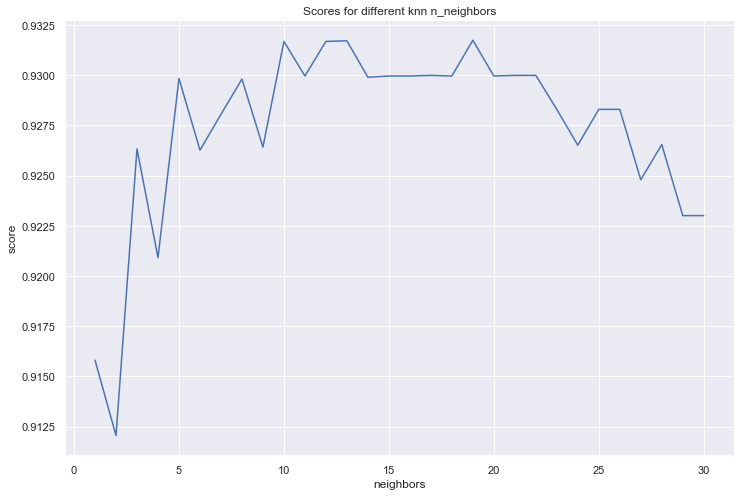

In [17]:
# A better way of model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Using the breast cancer
X = cancer.data
y = cancer.target

# Set up a range of n_neighbors from 1 to 30
neighbors = range(1, 31)

# Initialize mean scores
scores = []

# loop through the k ranges
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Obtain cross val scores (scoring mode=accuracy since its classification(MSE for regression))
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
    
    # append the score to scores
    scores.append(score)
    
# Plot scores vs neighbors
plt.figure(figsize=(12, 8))

plt.plot(neighbors, scores)

plt.title("Scores for different knn n_neighbors")
plt.xlabel("neighbors")
plt.ylabel("score")

plt.show()

The maximum score is at k between 10 and 18

# K-Fold for model selection
## Used to determine which model returns the highest score for a particular problem.

In [20]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
score

0.9317507129893698

In [26]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

logr = LogisticRegression()
score = cross_val_score(logr, X, y, cv=10, scoring='accuracy').mean()
score

0.9508998790078644

Logistic regression performs better
### K-Fold can also be used for feature selection